<a href="https://colab.research.google.com/github/anambibi/CSU-S15-118/blob/master/yolo_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
!pip install pydash 
from pydash import py_

     |████████████████████████████████| 84 kB 2.4 MB/s 


In [ ]:
net = cv2.dnn.readNetFromDarknet('/content/yolov2.cfg','/content/yolov3-spp.weights')

error: ignored

In [ ]:
classes = []
with open('/content/coco.names','r') as f:
  classes = [line.strip() for line in f.readlines()]

In [ ]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [ ]:
my_img = cv2.imread('/content/catdog1.jpg')
my_img = cv2.resize(my_img,(1100,600))
print (my_img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [211 211 211]
  [211 211 211]
  [211 211 211]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [211 211 211]
  [211 211 211]
  [211 211 211]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [211 211 211]
  [211 211 211]
  [211 211 211]]]


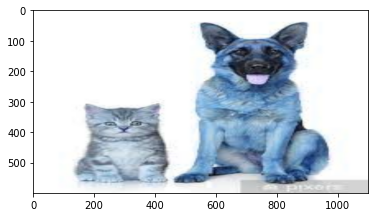

In [ ]:
plt.imshow(my_img)


In [ ]:
ht, wt , _ = my_img.shape

In [ ]:
blob = cv2.dnn.blobFromImage(my_img,1/255,(416,416),(0,0,0),swapRB = True,crop = False)
blob
blob.shape

(1, 3, 416, 416)

In [ ]:
net.setInput(blob)

In [ ]:
last_layer = net.getUnconnectedOutLayersNames()

In [ ]:
layer_out = net.forward(last_layer)

In [ ]:
boxes = []
confidences = []
class_ids = []

for output in layer_out:
      for detection in output:
            score = detection[5:]
            class_id = np.argmax(score)
            confidence = score[class_id]
            if confidence > .6:
                center_x = int(detection[0] * wt)
                center_y = int(detection[1] * ht)
                w = int(detection[2]* wt)
                h = int(detection[3]* ht)
                x = int(center_x - w/2)
                y = int(center_y - h/2)
                boxes.append([x,y,w,h])
                confidences.append((float(confidence)))
                class_ids.append(class_id)

In [ ]:
indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.6,0.5)
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255,size= (len(boxes),3))


NameError: ignored

In [ ]:
indexes

NameError: ignored

In [ ]:
for i in indexes():
       x,y,w,h = boxes[i]
       label = str(classes[class_ids[i]])
       confidence = str(round(confidences[i],2))
       color = colors[i]
       cv2.rectangle(my_img,(x,y),(x+w,y+h),color,2)
       cv2.putText(my_img,label +" "+confidence,(x,y+20),font,2,(0,0,0),2)

cv2_imshow(my_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
